<a href="https://colab.research.google.com/github/MaverickTopG/Glioma_AI_Detector_Project/blob/main/Glioma_AI_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the data

#!git clone https://github.com/MaverickTopG/AI-Dectector-for-Brain-Tumor-Image-Datasets.git


In [ ]:
# #How to unzip a file
# import zipfile
# with zipfile.ZipFile("/content/Data.zip","r") as zip:
#   zip.extractall("Data")

In [ ]:
# # To delete folders in one go as google colab doesn't allow it
# import shutil
# import os

# # Define the path to the folder you want to delete
# folder_path = "" # Add folder name that you want to delete

# # Check if the folder exists
# if os.path.exists(folder_path):
#     # Remove the folder and all its contents
#     shutil.rmtree(folder_path)
#     print(f"The folder '{folder_path}' has been removed.")
# else:
#     print(f"The folder '{folder_path}' does not exist.")

In [ ]:
# Checking for GPU status
# import tensorflow as tf

# # Check for GPU availability
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# # Print the details of the GPU
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#     raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))


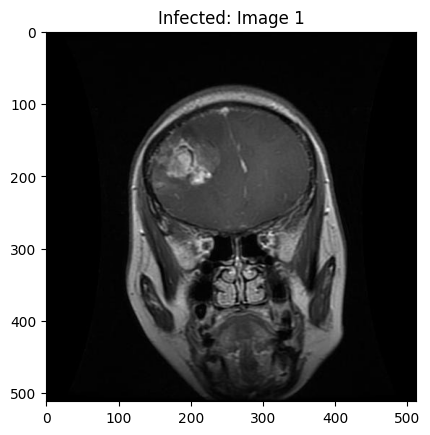

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread

training_infected_image = "/content/Data/Data/Training/glioma/Tr-glTr_0000.jpg"

# load image pixels
image = imread(training_infected_image)

pyplot.title("Infected: Image 1")

# plot raw pixel data
pyplot.imshow(image)

# show the figure
pyplot.show()

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# random rotation and width shift augumentation
training_data_generator = ImageDataGenerator(rotation_range=90,width_shift_range=0.3,fill_mode="nearest")

# image directory
training_image_directory = "/content/Data/Data/Training"

# genrating random rotated image file
training_augumented_img = training_data_generator.flow_from_directory(training_image_directory,target_size=(180,180))

Found 2916 images belonging to 2 classes.


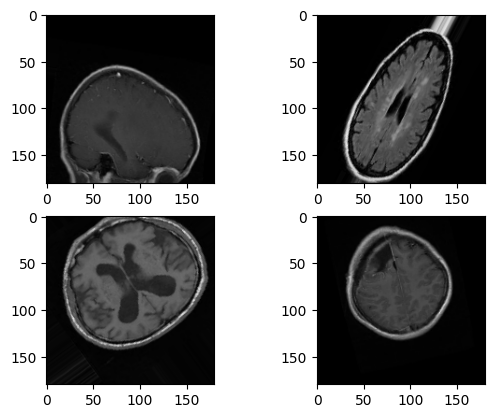

In [ ]:
# to display the augumented data
for i in range(4):
  #define subplot
  pyplot.subplot(2,2,i+1)
  #generate batch of the images
  batch = training_augumented_img.next()

  # convert to unsigned int
  image = batch[0][0].astype("uint8")
  # plot the pixel data
  pyplot.imshow(image)
# to display the graph
pyplot.show()

In [ ]:
# Training Data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array

# Random Data Augmentation(Rescale, Rotation, Flips, Zoom, Shifts) using ImageDataGenerator
training_data_generator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')


# Image Directory
training_image_directory = "/content/Data/Data/Training"

# Generate Preprocessed Augmented Data
training_augmented_images = training_data_generator.flow_from_directory(
    training_image_directory,
    target_size=(180,180))

Found 2916 images belonging to 2 classes.


In [ ]:
# Validating Data

# Random Data Augmentation(Rescale) using ImageDataGenerator
validation_data_generator = ImageDataGenerator(rescale = 1.0/255)

# Image Directory
validation_image_directory = "/content/Data/Data/Training"

# Generate Preprocessed Augmented Data
validation_augmented_images = validation_data_generator.flow_from_directory(
    validation_image_directory,
    target_size=(180,180))

Found 2916 images belonging to 2 classes.


In [ ]:
training_augmented_images.class_indices

{'glioma': 0, 'notumor': 1}

In [ ]:
# CNN Architecture style background info
# Learning Layers
#   Convolution + Activation(RELU) layers
#   Pooling Layers
# Classififcation Layers
#   Flatten Layer
#   Full connected(Dense) Layer
#   Fully connected(Dense) layer with Softmax

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
   # 1st Convolution and pooling layer with Batch Normalization
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # 2nd Convolution and pooling layer with Batch Normalization
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # 3rd Convolution and pooling layer with Batch Normalization
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # 4th Convolution and pooling layer with Batch Normalization
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Global Average Pooling layer instead of Flatten
    tf.keras.layers.GlobalAveragePooling2D(),

    # Dense layer with Dropout
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Classification layer
    tf.keras.layers.Dense(2, activation='softmax'),
])

# Compiling the model and minimizing the loss function using optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 178, 178, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 87, 87, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 178, 178, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 87, 87, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
# Fit and save model
history = model.fit(training_augmented_images, epochs=20, validation_data = validation_augmented_images, verbose=True)

model.save("Glioma.h5")

Epoch 1/20
92/92 [==============================] - 49s 429ms/step - loss: 0.2213 - accuracy: 0.9139 - val_loss: 0.4556 - val_accuracy: 0.7884
Epoch 2/20
92/92 [==============================] - 33s 360ms/step - loss: 0.1730 - accuracy: 0.9362 - val_loss: 1.2157 - val_accuracy: 0.5631
Epoch 3/20
92/92 [==============================] - 35s 383ms/step - loss: 0.1445 - accuracy: 0.9465 - val_loss: 0.3856 - val_accuracy: 0.8392
Epoch 4/20
92/92 [==============================] - 33s 364ms/step - loss: 0.1503 - accuracy: 0.9444 - val_loss: 0.9896 - val_accuracy: 0.5559
Epoch 5/20
92/92 [==============================] - 34s 365ms/step - loss: 0.1284 - accuracy: 0.9516 - val_loss: 1.9850 - val_accuracy: 0.5494
Epoch 6/20
92/92 [==============================] - 34s 368ms/step - loss: 0.1170 - accuracy: 0.9588 - val_loss: 6.6502 - val_accuracy: 0.5470
Epoch 7/20
92/92 [==============================] - 35s 383ms/step - loss: 0.1181 - accuracy: 0.9588 - val_loss: 6.4060 - val_accuracy: 0.5470

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Running/Testing the model
#Predict the Class of an Unseen Image

training_augmented_images.class_indices

{'glioma': 0, 'notumor': 1}

Skipping file /content/Data/Data/Testing/.DS_Store, not a valid image.
1/1 [==============================] - 0s 17ms/step


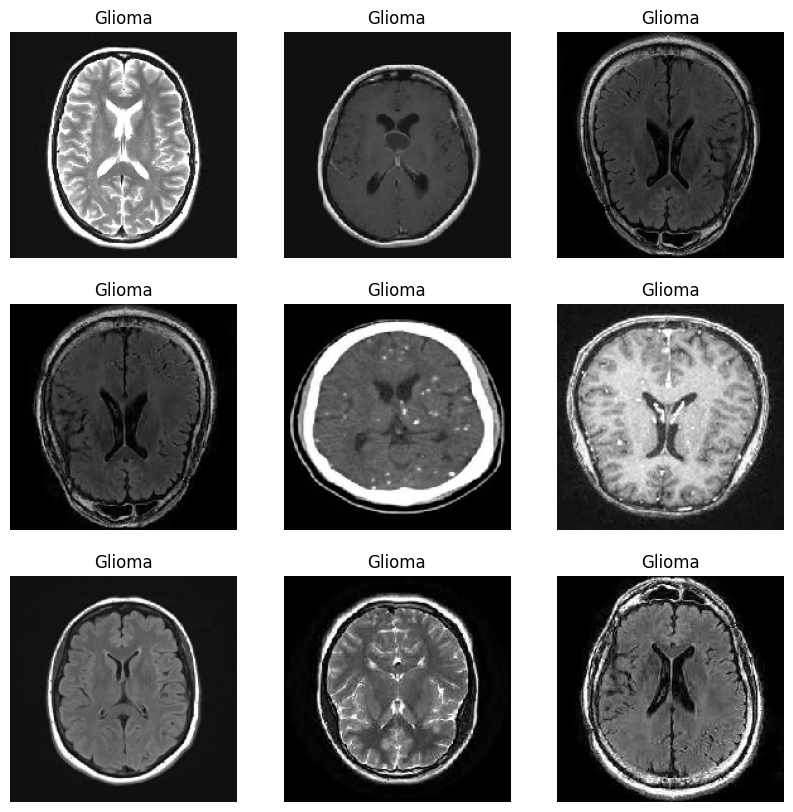

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import UnidentifiedImageError

# Assuming 'model' is your pre-trained model
# Ensure 'model' is loaded in your environment
# Example: model = tensorflow.keras.models.load_model('your_model_path.h5')

# Testing image directory
testing_image_directory = '/content/Data/Data/Testing'

# Initialize an empty list to store image file paths
img_files = []

# Recursively collect all image files in the directory and its subdirectories
for root, dirs, files in os.walk(testing_image_directory):
    for file in files:
        # Full path of the image
        file_path = os.path.join(root, file)
        img_files.append(file_path)

# Initialize the plot
plt.figure(figsize=(10, 10))

# Keep track of the number of images processed
images_displayed = 0

# Loop through image files and display up to 9 images
for i, img_files_path in enumerate(img_files):
    if images_displayed >= 9:
        break

    try:
        # Load image
        img = load_img(img_files_path, target_size=(180, 180))

        # Convert image to an array
        img_array = img_to_array(img)

        # Increase the dimension
        img_array = np.expand_dims(img_array, axis=0)

        # Predict the class of an unseen image
        prediction = model.predict(img_array)

        # Determine the class with the highest probability
        predict_class = np.argmax(prediction, axis=1)
        class_label = 'Glioma' if predict_class[0] == 1 else 'No Tumor'

        # Plot the image using subplot
        plt.subplot(3, 3, images_displayed + 1)
        plt.imshow(img_array[0].astype('uint8'))

        # Add title of the plot as predicted class value
        plt.title(class_label)

        # Do not show x and y axis with the image
        plt.axis('off')

        # Increment the counter for displayed images
        images_displayed += 1

    except UnidentifiedImageError:
        print(f"Skipping file {img_files_path}, not a valid image.")
    except Exception as e:
        print(f"Error processing file {img_files_path}: {e}")

# Show the plot
plt.show()


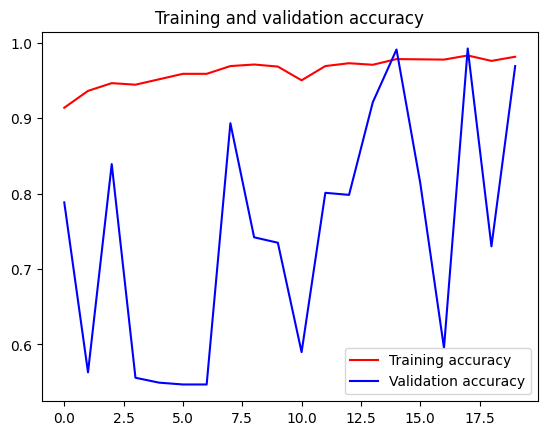

In [ ]:
# Accuracy Curve

from matplotlib import pyplot

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# print(acc)
# print(val_acc)

epochs = range(len(acc))

pyplot.plot(epochs, acc, 'r', label='Training accuracy')
pyplot.plot(epochs, val_acc, 'b', label='Validation accuracy')

pyplot.title('Training and validation accuracy')

pyplot.legend()

pyplot.show()

In [ ]:
!pip3 install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 58.5 MB/s eta 0:00:00


In [ ]:
# Conversion of Model from using Tensorflow and Keras to ONNX
import tensorflow as tf
import tf2onnx
import onnx

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, activation="relu"))

input_signature = [tf.TensorSpec([3, 3], tf.float32, name='x')]
# Use from_function for tf functions
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature, opset=13)
onnx.save(onnx_model, "/content/model.onnx")